In [1]:
import pandas as pd

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
data= pd.read_csv(r"C:\Users\HP\Downloads\titanic\gender_submission.csv")
data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
test= pd.read_csv(r"C:\Users\HP\Downloads\titanic\test.csv")
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train= pd.read_csv(r"C:\Users\HP\Downloads\titanic\train.csv")
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

In [7]:
# Checking for missing values
missing_values_train = train.isnull().sum()
missing_values_train_percentage = (missing_values_train / len(train)) * 100

missing_values_train_df = pd.DataFrame({
    'Column': missing_values_train.index,
    'Missing Values': missing_values_train.values,
    'Percentage': missing_values_train_percentage
})
print("Missing Values in Train Dataset:")
print(missing_values_train_df.sort_values(by='Percentage', ascending=False))

Missing Values in Train Dataset:
                  Column  Missing Values  Percentage
Cabin              Cabin             687   77.104377
Age                  Age             177   19.865320
Embarked        Embarked               2    0.224467
PassengerId  PassengerId               0    0.000000
Survived        Survived               0    0.000000
Pclass            Pclass               0    0.000000
Name                Name               0    0.000000
Sex                  Sex               0    0.000000
SibSp              SibSp               0    0.000000
Parch              Parch               0    0.000000
Ticket            Ticket               0    0.000000
Fare                Fare               0    0.000000


In [8]:
# Drop the 'Cabin' column
train_cleaned = train.drop(columns=['Cabin'])

# Impute missing 'Age' values with the median age
median_age = train_cleaned['Age'].median()
train_cleaned['Age'].fillna(median_age, inplace=True)

# Impute missing 'Embarked' values with the mode
mode_embarked = train_cleaned['Embarked'].mode()[0]
train_cleaned['Embarked'].fillna(mode_embarked, inplace=True)

# Verify that there are no missing values left
missing_values_cleaned = train_cleaned.isnull().sum()

missing_values_cleaned_df = pd.DataFrame({
    'Column': missing_values_cleaned.index,
    'Missing Values': missing_values_cleaned.values
})
print("Missing values in cleaned Train dataset:")
print(missing_values_cleaned_df.sort_values(by='Missing Values', ascending=False))

Missing values in cleaned Train dataset:
         Column  Missing Values
0   PassengerId               0
1      Survived               0
2        Pclass               0
3          Name               0
4           Sex               0
5           Age               0
6         SibSp               0
7         Parch               0
8        Ticket               0
9          Fare               0
10     Embarked               0


C:\Users\HP\AppData\Local\Temp\ipykernel_28652\4233447141.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_cleaned['Age'].fillna(median_age, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_28652\4233447141.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

# EDA (Exploratory Data Analysis)

In [14]:
# Summary statistics for numerical columns
numerical_summary = train_cleaned.describe()

# Distribution of categorical variables
categorical_summary = train_cleaned.describe(include=['O'])

print("Numerical Summary Statistics")
print(numerical_summary)

print("Categorical Summary Statistics")
print(categorical_summary)


Numerical Summary Statistics
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Categorical Summary Statistics
                     

## Univariate Analysis

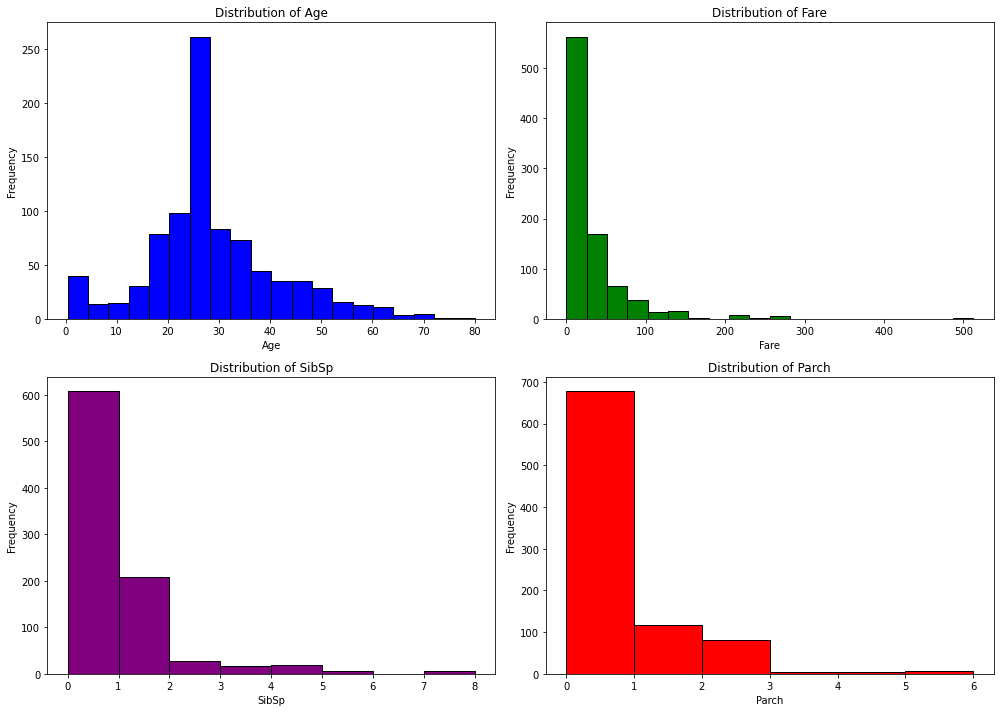

In [15]:
import matplotlib.pyplot as plt

# Plot histograms for continuous variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age
axes[0, 0].hist(train_cleaned['Age'], bins=20, color='blue', edgecolor='black')
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Fare
axes[0, 1].hist(train_cleaned['Fare'], bins=20, color='green', edgecolor='black')
axes[0, 1].set_title('Distribution of Fare')
axes[0, 1].set_xlabel('Fare')
axes[0, 1].set_ylabel('Frequency')

# SibSp
axes[1, 0].hist(train_cleaned['SibSp'], bins=8, color='purple', edgecolor='black')
axes[1, 0].set_title('Distribution of SibSp')
axes[1, 0].set_xlabel('SibSp')
axes[1, 0].set_ylabel('Frequency')

# Parch
axes[1, 1].hist(train_cleaned['Parch'], bins=6, color='red', edgecolor='black')
axes[1, 1].set_title('Distribution of Parch')
axes[1, 1].set_xlabel('Parch')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_28652\1892482914.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], x='Survived', data=train_cleaned, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_28652\1892482914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 1], x='Pclass', data=train_cleaned, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_28652\1892482914.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1, 0], x='Sex', data=train_cleaned, palette='viridis')
C:\Users\HP\

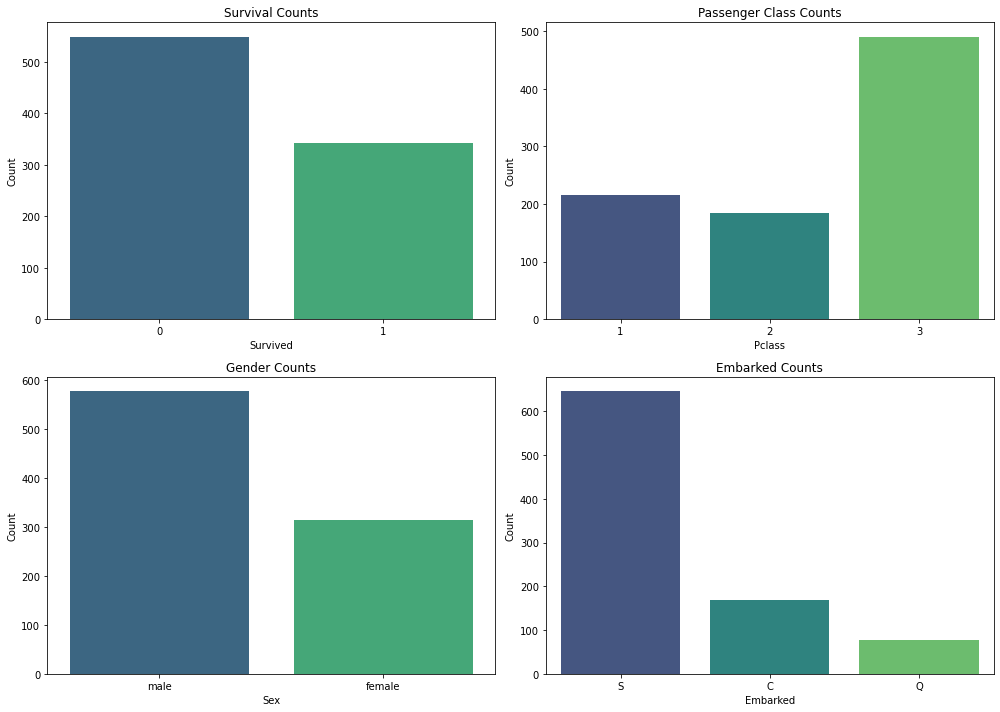

In [16]:
import seaborn as sns

# Plot bar plots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Survived
sns.countplot(ax=axes[0, 0], x='Survived', data=train_cleaned, palette='viridis')
axes[0, 0].set_title('Survival Counts')
axes[0, 0].set_xlabel('Survived')
axes[0, 0].set_ylabel('Count')

# Pclass
sns.countplot(ax=axes[0, 1], x='Pclass', data=train_cleaned, palette='viridis')
axes[0, 1].set_title('Passenger Class Counts')
axes[0, 1].set_xlabel('Pclass')
axes[0, 1].set_ylabel('Count')

# Sex
sns.countplot(ax=axes[1, 0], x='Sex', data=train_cleaned, palette='viridis')
axes[1, 0].set_title('Gender Counts')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Count')

# Embarked
sns.countplot(ax=axes[1, 1], x='Embarked', data=train_cleaned, palette='viridis')
axes[1, 1].set_title('Embarked Counts')
axes[1, 1].set_xlabel('Embarked')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


## Bivariate Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_28652\1539954941.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Pclass', y='Survived', data=train_cleaned, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_28652\1539954941.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Sex', y='Survived', data=train_cleaned, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_28652\1539954941.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x='Embarked', y='Survived', data=train_cleaned, pale

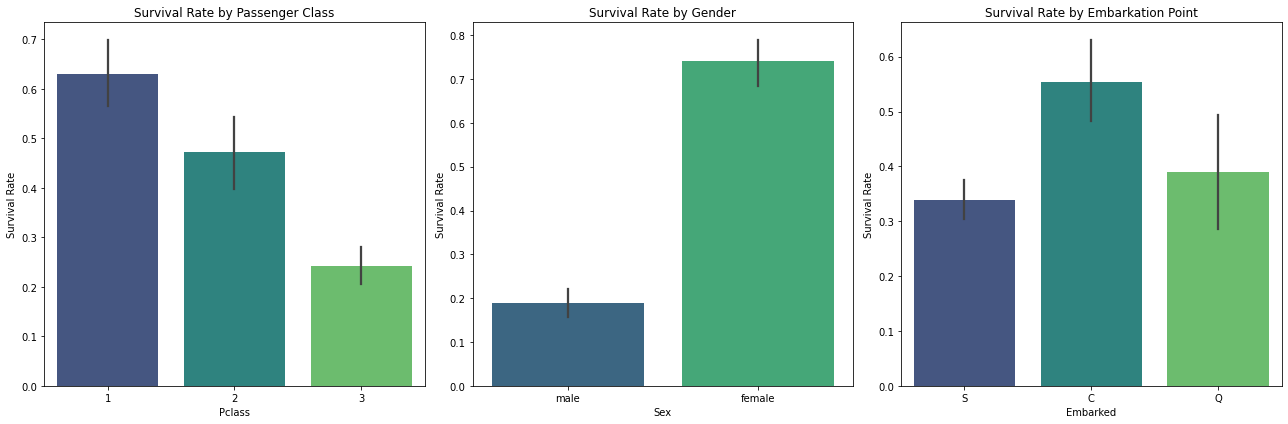

In [17]:
# Plot survival rates by Pclass, Sex, and Embarked
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Survival rate by Pclass
sns.barplot(ax=axes[0], x='Pclass', y='Survived', data=train_cleaned, palette='viridis')
axes[0].set_title('Survival Rate by Passenger Class')
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Survival Rate')

# Survival rate by Sex
sns.barplot(ax=axes[1], x='Sex', y='Survived', data=train_cleaned, palette='viridis')
axes[1].set_title('Survival Rate by Gender')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Survival Rate')

# Survival rate by Embarked
sns.barplot(ax=axes[2], x='Embarked', y='Survived', data=train_cleaned, palette='viridis')
axes[2].set_title('Survival Rate by Embarkation Point')
axes[2].set_xlabel('Embarked')
axes[2].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_28652\698437053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='Survived', y='Age', data=train_cleaned, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_28652\698437053.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='Survived', y='Fare', data=train_cleaned, palette='viridis')


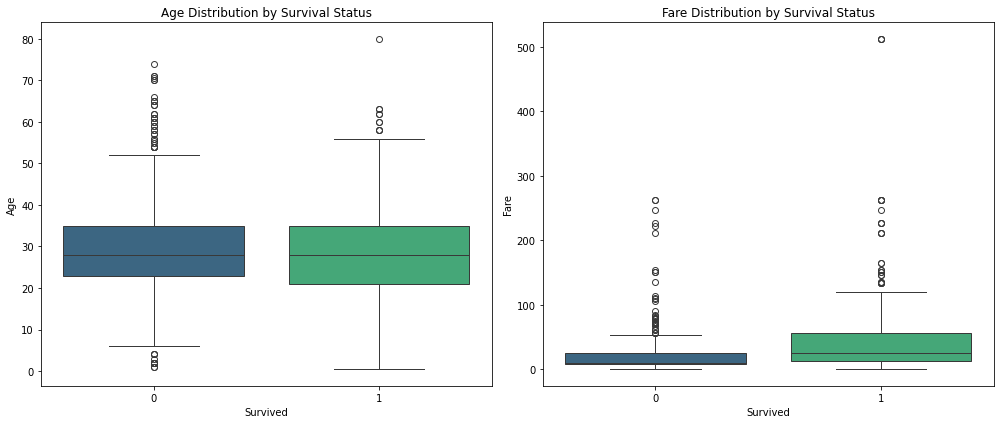

In [18]:
# Plot box plots for Age and Fare against Survived
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Age vs Survived
sns.boxplot(ax=axes[0], x='Survived', y='Age', data=train_cleaned, palette='viridis')
axes[0].set_title('Age Distribution by Survival Status')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Age')

# Fare vs Survived
sns.boxplot(ax=axes[1], x='Survived', y='Fare', data=train_cleaned, palette='viridis')
axes[1].set_title('Fare Distribution by Survival Status')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Fare')

plt.tight_layout()
plt.show()


In [20]:
# Create FamilySize feature
train_cleaned['FamilySize'] = train_cleaned['SibSp'] + train_cleaned['Parch'] + 1

# Extract titles from the Name column
train_cleaned['Title'] = train_cleaned['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Create IsAlone feature
train_cleaned['IsAlone'] = (train_cleaned['FamilySize'] == 1).astype(int)

# Display the first few rows to verify the new features
print("Train Dataset with New Features")

train_cleaned[['FamilySize', 'Title', 'IsAlone']].head()


Train Dataset with New Features


,FamilySize,Title,IsAlone
0,2,Mr,0
1,2,Mrs,0
2,1,Miss,1
3,2,Mrs,0
4,1,Mr,1
